# Binary Classification - Home Team Win-Loss Modeling
This short script imports logistic regression model class from sklearn and splits the data into test and validation sets to evaluate the performance on out of sample games.

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report

In [6]:
data = pd.read_csv('nbaHomeWinLossModelDataset.csv').drop(['Unnamed: 0'],axis=1)
data = data.dropna()
data.head(10)

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,1,2020-21,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,1,2020-21,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,1,2020-21,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,1,2020-21,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,1,2020-21,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
5,0.622951,0.645161,2.0,0.457143,0.545455,-0.666667,0.561996,1,2020-21,0.666667,0.735294,1.0,0.709677,0.723077,13.333333,0.644613
6,0.549020,0.633333,2.0,0.457143,0.538462,-18.333333,0.507124,1,2020-21,0.596639,0.500000,1.0,0.625000,0.562500,16.666667,0.599989
7,0.514019,0.620690,1.0,0.457143,0.531250,-26.666667,0.480273,1,2020-21,0.521739,0.387097,1.0,0.437500,0.412698,-7.000000,0.568524
8,0.669565,0.774194,2.0,0.548387,0.661290,12.333333,0.569549,1,2020-21,0.458333,0.620690,2.0,0.470588,0.539683,-17.000000,0.489968
9,0.596774,0.766667,2.0,0.548387,0.655738,-4.666667,0.549138,1,2020-21,0.468468,0.620690,2.0,0.484848,0.548387,2.666667,0.540221


In [7]:
validation = data[data['SEASON'] == '2022-23']
modelData = data[data['SEASON'] != '2022-23'].sample(frac=1)

In [8]:
X = modelData.drop(['HOME_W','SEASON'],axis=1)
y = modelData['HOME_W']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train)

scaler.fit(X_test)
scaled_data_test = scaler.transform(X_test)

In [9]:
#Logistic Regression

model = LogisticRegression()
model.fit(scaled_data_train,y_train)
model.score(scaled_data_test,y_test)

0.6130790190735694

In [10]:
F1Score = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro');
print("Logistic Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

Logistic Model F1 Accuracy: 0.58 (+/- 0.13)


In [11]:
# Test Set Review

y_pred = model.predict(scaled_data_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       334
           1       0.63      0.71      0.67       400

    accuracy                           0.61       734
   macro avg       0.61      0.60      0.60       734
weighted avg       0.61      0.61      0.61       734



In [12]:
#Validation Set review

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(validation.drop(['HOME_W','SEASON'],axis=1))
scaled_val_data = scaler.transform(validation.drop(['HOME_W','SEASON'],axis=1))

In [13]:
# How the model performs on unseen data
y_pred = model.predict(scaled_val_data)
print(classification_report(validation['HOME_W'],y_pred))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       493
           1       0.65      0.71      0.68       690

    accuracy                           0.61      1183
   macro avg       0.60      0.59      0.59      1183
weighted avg       0.60      0.61      0.61      1183



/Users/apple/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


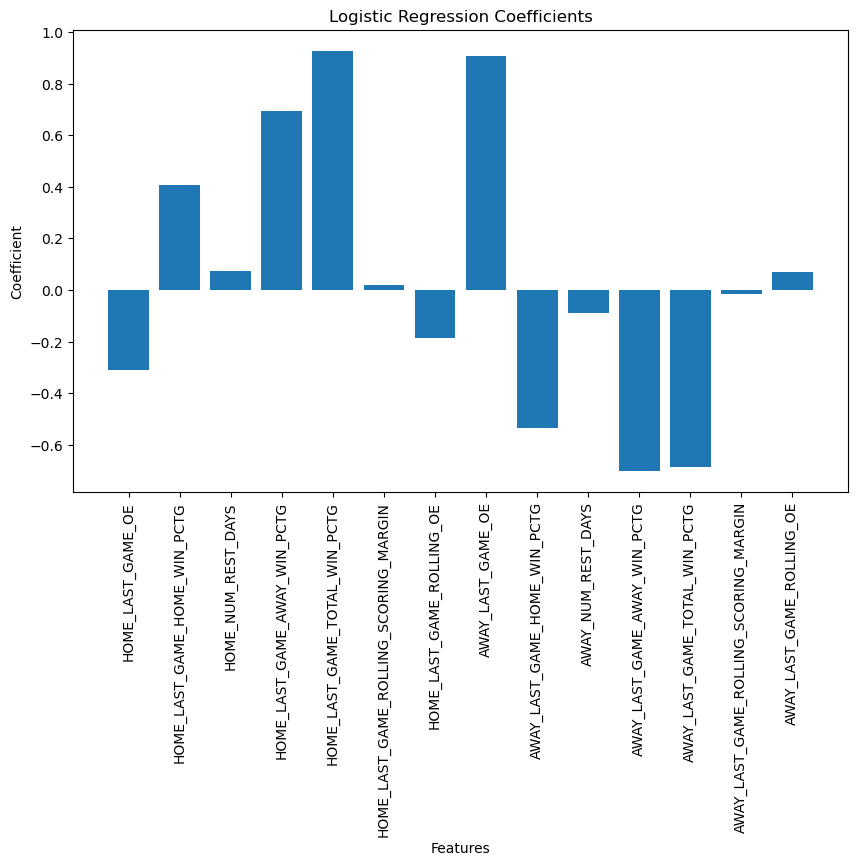

In [14]:
import matplotlib.pyplot as plt

# Fit the logistic regression model
model.fit(X_train, y_train)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()
